## Модуль 4. Теоретический минимум для ML: линейная алгебра, начала мат.анализа и оптимизации.

### 1. Линейная алгебра

1. Даны матрицы:

$$A = \begin{pmatrix}
2 & -4 \\
3 & 5 \\
-1 & 0
\end{pmatrix}, \quad
B = \begin{pmatrix}
1 & 2 & 7 \\
-3 & -4 & 0 \\
5 & 2 & 1
\end{pmatrix}, \quad
C = \begin{pmatrix}
6 & -3 & 9 \\
4 & -5 & 2 \\
8 & 1 & 5
\end{pmatrix}.$$

Посчитайте матрицу $D = A^{\top} C - 2 A^{\top} B^{\top}$. Приведите полную последовательность вычислений.

In [2]:
import numpy as np
import sympy as sp
from IPython.display import display, Markdown

sp.init_session(quiet=True)

# Определение матриц
A = np.array([[2, -4], [3, 5], [-1, 0]])
B = np.array([[1, 2, 7], [-3, -4, 0], [5, 2, 1]])
C = np.array([[6, -3, 9], [4, -5, 2], [8, 1, 5]])

# Транспонирование A
At = sp.MatrixSymbol("A^T", 2, 3)
display(sp.Eq(At, sp.Matrix(A).transpose(), evaluate=False))


# Транспонирование B
Bt = sp.MatrixSymbol("B^T", 3, 3)
display(sp.Eq(Bt, sp.Matrix(B).transpose(), evaluate=False))

# Вычисление A^T * C
C_s = sp.Symbol("C")
A_T_C = sp.Matrix(A).transpose() * sp.Matrix(C)
display(sp.Eq(At * C_s, A_T_C, evaluate=False))

# Вычисление 2 * A^T * B^T
two_A_T_B_T = sp.Matrix(A).transpose() * sp.Matrix(B).transpose()

display(sp.Eq(2 * At * Bt, two_A_T_B_T, evaluate=False))

# Вычисление D = A^T * C - 2 * A^T * B^T
D_s = sp.MatrixSymbol("D", 2, 3)
display(sp.Eq(D_s, A_T_C - two_A_T_B_T, evaluate=False))

       ⎡2   3  -1⎤
A__T = ⎢         ⎥
       ⎣-4  5  0 ⎦

       ⎡1  -3  5⎤
       ⎢        ⎥
B__T = ⎢2  -4  2⎥
       ⎢        ⎥
       ⎣7  0   1⎦

         ⎡16  -22  19 ⎤
C⋅A__T = ⎢            ⎥
         ⎣-4  -13  -26⎦

              ⎡1  -18  15 ⎤
2⋅A__T⋅B__T = ⎢           ⎥
              ⎣6  -8   -10⎦

    ⎡15   -4   4 ⎤
D = ⎢            ⎥
    ⎣-10  -5  -16⎦

#### 2. Дано выражение:

$$3 \cdot \begin{pmatrix}
x & 2 & 3 \\
-1 & y & 4
\end{pmatrix} + 2 \cdot \begin{pmatrix}
1 & 2 & -5 \\
2 & -6 & z
\end{pmatrix} = \begin{pmatrix}
8 & v & -1 \\
1 & 6 & 4
\end{pmatrix}.$$

Найдите значения $x, y, z$ и $v$, при которых выражение верно.

#### Начало решения тут потому что быстрее сложить матрицы в уме чем мучаться в sympy

Действие №1

$$\begin{pmatrix}
3x & 6 & 9 \\
-3 & 3y & 12
\end{pmatrix} + \begin{pmatrix}
2 & 4 & -10 \\
4 & -12 & 2z
\end{pmatrix} = \begin{pmatrix}
8 & v & -1 \\
1 & 6 & 4
\end{pmatrix}.$$

Действие №2

$$\begin{pmatrix}
3x+2 & 10 & -1 \\
1 & 3y-12 & 12+2z
\end{pmatrix} = \begin{pmatrix}
8 & v & -1 \\
1 & 6 & 4
\end{pmatrix}.$$

In [19]:
# Для каждого элемента матрицы составим уравнение

# Для элемента (1,1):
# 3x + 2 = 8
# 3x = 6
# x = 2
x = 2
print(f"x = {x}")

# Для элемента (1,2):
# v = 10
v = 10
print(f"v = {v}")

# Для элемента (1,3):
# -1 = -1 (верно)

# Для элемента (2,1):
# 1 = 1 (верно)

# Для элемента (2,2):
# 3y - 12 = 6
# 3y = 18
# y = 6
y = 6
print(f"y = {y}")

# Для элемента (2,3):
# 12 + 2z = 4
# 2z = -8
# z = -4
z = -4
print(f"z = {z}")

# Проверка
left_side = 3 * np.array([[x, 2, 3], [-1, y, 4]]) + 2 * np.array([[1, 2, -5], [2, -6, z]])
right_side = np.array([[8, v, -1], [1, 6, 4]])
display(
    Markdown(
        "Левая часть: {}".format(
            sp.latex(sp.Matrix(left_side), mode="inline"),
        )
    )
)

display(
    Markdown(
        "Правая часть: {}".format(
            sp.latex(sp.Matrix(right_side), mode="inline"),
        )
    )
)

print("Равенство выполняется:", np.array_equal(left_side, right_side))

x = 2
v = 10
y = 6
z = -4


Левая часть: $\left[\begin{smallmatrix}8 & 10 & -1\\1 & 6 & 4\end{smallmatrix}\right]$

Правая часть: $\left[\begin{smallmatrix}8 & 10 & -1\\1 & 6 & 4\end{smallmatrix}\right]$

Равенство выполняется: True


#### 3. Относительно канонического (стандартного) базиса в $\mathbb{R}^2$ даны три вектора $\mathbf{a}_1 = (2, -5)^{\top}$, $\mathbf{a}_2 = (-1, 3)^{\top}$, и $\mathbf{x} = (1, -4)^{\top}$. Примите векторы $\mathbf{a}_1$, $\mathbf{a}_2$ за новый базис $B$, предварительно проверив, что они линейно независимы.

(a) Найдите координаты $[\mathbf{x}]_B$ вектора $\mathbf{x}$ в новом базисе.
(b) Предположим, что координаты вектора $\mathbf{y}$ в базисе $B$ заданы $[\mathbf{y}]_B = (1, 1)^T$. Найдите координаты вектора $\mathbf{y}$ в стандартном базисе.

In [ ]:
# Определение векторов
a1 = np.array([2, -5])
a2 = np.array([-1, 3])
x = np.array([1, -4])

a_1, a_2, x_s, B_s, X_b = sp.symbols('a_1 a_2 x B [x]_B')

# Проверка линейной независимости векторов a1 и a2
# Векторы линейно независимы, если их определитель не равен нулю
A = np.column_stack((a1, a2))
det_A = sp.Matrix(A).det()
print(f"Определитель матрицы A = {det_A}")
display(
    Markdown(
        "Векторы {} и {} линейно {}".format(
            sp.latex(a_1, mode="inline"),
            sp.latex(a_2, mode="inline"),
            'независимы' if det_A != 0 else 'зависимы'
        )
    )
)

# (a) Найдем координаты вектора x в новом базисе B
# Решаем систему уравнений: x = c1*a1 + c2*a2
# Где c1 и c2 - координаты вектора x в базисе B
c = np.linalg.solve(A, x)
print(f"Координаты вектора x в базисе B: [x]_B = {c}")

# Проверка
x_reconstructed = c[0] * a1 + c[1] * a2
print(f"Проверка: x = {int(c[0])}*a1 + {int(c[1])}*a2 = {x_reconstructed}")
print(f"Исходный вектор x = {x}")
print(f"Равенство выполняется: {np.allclose(x, x_reconstructed)}")

# (b) Найдем координаты вектора y в стандартном базисе
# Даны координаты вектора y в базисе B: [y]_B = (1, 1)^T
y_B = np.array([1, 1])

# Координаты вектора y в стандартном базисе: y = [y]_B[0] * a1 + [y]_B[1] * a2
y = y_B[0] * a1 + y_B[1] * a2
print(f"Координаты вектора y в стандартном базисе: y = {y}")

Определитель матрицы A = 1


Векторы $a_{1}$ и $a_{2}$ линейно независимы

Координаты вектора x в базисе B: [x]_B = [-1. -3.]
Проверка: x = 0*a1 + -2*a2 = [ 1. -4.]
Исходный вектор x = [ 1 -4]
Равенство выполняется: True
Координаты вектора y в стандартном базисе: y = [ 1 -2]


#### 4. Исследовательское задание: малоранговая аппроксимация матрицы. 

Сгенерируйте случайную квадратную матрицу $A \in \mathbb{R}^{n \times n}$, $n \geq 100$. Выполните сингулярное разложение этой матрицы, и получите три матрицы: $U, S, V^{\top}$. Выполняйте аппроксимацию матрицы $A$ с рангом $r$, меняя его значение, например, от $2$ до $n$:

$$\tilde{A} = U[:, :r] S[:r, :r] V^{\top}[:r, :],$$

и каждый раз считайте ошибку апроксимации (как восстановленная матрица отличается от исходной):

$$E(r) = \|A - \tilde{A}\|_F = \sqrt{\sum_{i=1}^{n} \sum_{j=1}^{n} (a_{ij} - \tilde{a}_{ij})^2}.$$

Используя библиотеку matplotlib, постройте график зависимости ошибки аппроксимации матрицы от ранга $r$.

Ошибка полного SVD разложения: 8.753305533374045e-14
Ранг 1: ошибка = 28.5251


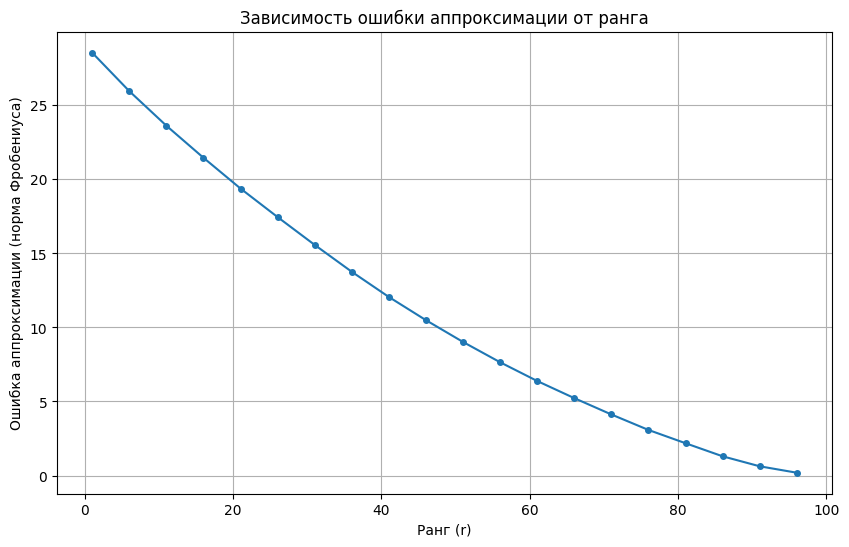

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Размер матрицы
n = 100

# Генерация случайной матрицы
np.random.seed(42)  # для воспроизводимости результатов
A = np.random.rand(n, n)

# Сингулярное разложение матрицы A
U, S, Vt = np.linalg.svd(A, full_matrices=True)

# Создаем диагональную матрицу S из вектора сингулярных значений
S_matrix = np.zeros((n, n))
np.fill_diagonal(S_matrix, S)

# Проверка корректности разложения
A_reconstructed = U @ S_matrix @ Vt
print(f"Ошибка полного SVD разложения: {norm(A - A_reconstructed, 'fro')}")

# Вычисление ошибки аппроксимации для разных значений ранга r
ranks = range(1, n + 1, 5)  # Берем каждый 5-й ранг для ускорения вычислений
errors = []

for r in ranks:
    # Аппроксимация матрицы A с рангом r
    A_approx = U[:, :r] @ S_matrix[:r, :r] @ Vt[:r, :]

    # Вычисление ошибки аппроксимации (норма Фробениуса разности матриц)
    error = norm(A - A_approx, "fro")
    errors.append(error)

    # Вывод информации о прогрессе
    if r % 10 == 0 or r == 1:
        print(f"Ранг {r}: ошибка = {error:.4f}")

# Построение графика зависимости ошибки аппроксимации от ранга
plt.figure(figsize=(10, 6))
plt.plot(ranks, errors, "o-", markersize=4)
plt.title("Зависимость ошибки аппроксимации от ранга")
plt.xlabel("Ранг (r)")
plt.ylabel("Ошибка аппроксимации (норма Фробениуса)")
plt.grid(True)
plt.show()

## 2. Начала мат.анализа и оптимизации

#### 1. Посчитайте градиент следующей функции:

$$f(\mathbf{x}) = x_1^3 - 2x_1 x_2 + x_2^2 - 3x_1 - 2x_2, \quad \mathbf{x} \in \mathbb{R}^2.$$

Найдите критические точки $\mathbf{x}_c$, такие что $\nabla f(\mathbf{x}_c) = 0$.

In [6]:
# Определение символьных переменных
x1, x2, f= sp.symbols('x1 x2 f')

# Определение функции
f = x1**3 - 2*x1*x2 + x2**2 - 3*x1 - 2*x2

# Вычисление частных производных
df_dx1 = sp.diff(f, x1)
df_dx2 = sp.diff(f, x2)

display(Markdown('Частная производная по x1 = {}'.format(sp.latex(df_dx1, mode='inline'))))
display(Markdown('Частная производная по x2 =  {}'.format(sp.latex(df_dx2, mode='inline'))))


# Градиент функции
grad_f=(df_dx1, df_dx2)
display(Markdown('Градиент функции ∇f(x) = {}'.format(sp.latex(grad_f, mode='inline'))))

# Нахождение критических точек
# Решаем систему уравнений: ∇f(x) = 0
critical_points = sp.solve([df_dx1, df_dx2], [x1, x2])
display(Markdown('Критические точки : {}'.format(sp.latex(critical_points, mode='inline'))))

# Проверка критических точек

print("______________________________________")
for i, point in enumerate(critical_points):
    x1_val, x2_val = point
    grad_val = [df_dx1.subs({x1: x1_val, x2: x2_val}), df_dx2.subs({x1: x1_val, x2: x2_val})]
    display(Markdown('Точка {}: {}, {}'.format(i+1,sp.latex(x1_val, mode='inline'),sp.latex(x2_val, mode='inline'))))
    display(Markdown('Значение градиента: [{} , {}]'.format(sp.latex(grad_val[0], mode='inline'),sp.latex(grad_val[1], mode='inline'))))
    print("______________________________________")

Частная производная по x1 = $3 x_{1}^{2} - 2 x_{2} - 3$

Частная производная по x2 =  $- 2 x_{1} + 2 x_{2} - 2$

Градиент функции ∇f(x) = $\left( 3 x_{1}^{2} - 2 x_{2} - 3, \  - 2 x_{1} + 2 x_{2} - 2\right)$

Критические точки : $\left[ \left( -1, \  0\right), \  \left( 5 / 3, \  8 / 3\right)\right]$

______________________________________


Точка 1: $-1$, $0$

Значение градиента: [$0$ , $0$]

______________________________________


Точка 2: $5 / 3$, $8 / 3$

Значение градиента: [$0$ , $0$]

______________________________________


### 2. Проверьте, что функция $f = \ln(\sqrt{x_1} + \sqrt{x_2})$ удовлетворяет уравнению:

$$x_1 \frac{\partial f}{\partial x_1} + x_2 \frac{\partial f}{\partial x_2} = \frac{1}{2}.$$

In [7]:
# Определение символьных переменных
x1, x2, dx1, dx2, df = sp.symbols("x_1 x_2 dx_1 dx_2 df", positive=True)  # Предполагаем, что x1 и x2 положительны

# Определение функции
f = sp.log(sp.sqrt(x1) + sp.sqrt(x2))

# Вычисление частных производных
df_dx1 = sp.diff(f, x1)
df_dx2 = sp.diff(f, x2)

display(Markdown("Функция: f = {}".format(sp.latex(f, mode="inline"))))
display(
    Markdown(
        "Частная производная по   {}: {} = {}".format(
            sp.latex(x1, mode="inline"), sp.latex(df / dx1, mode="inline"), sp.latex(df_dx1, mode="inline")
        )
    )
)
display(
    Markdown(
        "Частная производная по   {}: {} = {}".format(
            sp.latex(x2, mode="inline"), sp.latex(df / dx2, mode="inline"), sp.latex(df_dx2, mode="inline")
        )
    )
)

# Вычисление левой части уравнения
left_side = x1 * df_dx1 + x2 * df_dx2
display(
    Markdown(
        "Левая часть уравнения: {} * {} + {} * {} = {}".format(
            sp.latex(x1, mode="inline"),
            sp.latex(df / dx1, mode="inline"),
            sp.latex(x2, mode="inline"),
            sp.latex(df / dx2, mode="inline"),
            sp.latex(left_side, mode="inline"),
        )
    )
)

# Упрощение выражения
left_side_simplified = sp.simplify(left_side)
print(f"Упрощенная левая часть: {left_side_simplified}")

# Проверка равенства
right_side = sp.Rational(1, 2)  # 1/2
is_equal = sp.simplify(left_side - right_side) == 0
print(f"Проверка равенства: {left_side_simplified} = {right_side} ? {is_equal}")

Функция: f = $\log{\left(\sqrt{x_{1}} + \sqrt{x_{2}} \right)}$

Частная производная по   $x_{1}$: $df / dx_{1}$ = $\frac{1}{2 \sqrt{x_{1}} \left(\sqrt{x_{1}} + \sqrt{x_{2}}\right)}$

Частная производная по   $x_{2}$: $df / dx_{2}$ = $\frac{1}{2 \sqrt{x_{2}} \left(\sqrt{x_{1}} + \sqrt{x_{2}}\right)}$

Левая часть уравнения: $x_{1}$ * $df / dx_{1}$ + $x_{2}$ * $df / dx_{2}$ = $\frac{\sqrt{x_{1}}}{2 \left(\sqrt{x_{1}} + \sqrt{x_{2}}\right)} + \frac{\sqrt{x_{2}}}{2 \left(\sqrt{x_{1}} + \sqrt{x_{2}}\right)}$

Упрощенная левая часть: 1/2
Проверка равенства: 1/2 = 1/2 ? True


### 3. Предположим, задана функция $f: \mathbb{R}^3 \to \mathbb{R}$:

$$f(x, y, z) = x + y + z + (xyz)^2.$$

Найдите вектор градиента функции $f$, и его численное значение в точке $\mathbf{v} = (1, 2, 3)^{\top}$.

In [8]:
# Определение символьных переменных
x, y, z, dx, dy, dz = sp.symbols("x y z dx dy dz")

# Определение функции
f = x + y + z + (x * y * z) ** 2
display(
    Markdown(
        "Функция: f(x, y, z) = {}".format(
            sp.latex(f, mode="inline"),
        )
    )
)

# Вычисление частных производных
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)
df_dz = sp.diff(f, z)

display(
    Markdown(
        "Частная производная по x: {} = {}".format(
            sp.latex(df / dx, mode="inline"),
            sp.latex(df_dx, mode="inline"),
        )
    )
)
display(
    Markdown(
        "Частная производная по y: {} = {}".format(
            sp.latex(df / dy, mode="inline"),
            sp.latex(df_dy, mode="inline"),
        )
    )
)
display(
    Markdown(
        "Частная производная по z: {} = {}".format(
            sp.latex(df / dz, mode="inline"),
            sp.latex(df_dz, mode="inline"),
        )
    )
)




# Градиент функции

grad_f = [df_dx, df_dy, df_dz]
display(
    Markdown(
        "Градиент функции: ∇f(x, y, z) = {}".format(
            sp.latex(grad_f, mode="inline"),
        )
    )
)


# Вычисление численного значения градиента в точке v = (1, 2, 3)
v = (1, 2, 3)
grad_f_v = [float(expr.subs({x: v[0], y: v[1], z: v[2]})) for expr in grad_f]


display(
    Markdown(
        "Численное значение градиента в точке v = {}   ∇f(v) = {}".format(
            sp.latex(v, mode="inline"),
            sp.latex(grad_f_v, mode="inline"),
        )
    )
)


Функция: f(x, y, z) = $x^{2} y^{2} z^{2} + x + y + z$

Частная производная по x: $df / dx$ = $2 x y^{2} z^{2} + 1$

Частная производная по y: $df / dy$ = $2 x^{2} y z^{2} + 1$

Частная производная по z: $df / dz$ = $2 x^{2} y^{2} z + 1$

Градиент функции: ∇f(x, y, z) = $\left[ 2 x y^{2} z^{2} + 1, \  2 x^{2} y z^{2} + 1, \  2 x^{2} y^{2} z + 1\right]$

Численное значение градиента в точке v = $\left( 1, \  2, \  3\right)$   ∇f(v) = $\left[ 73.0, \  37.0, \  25.0\right]$

### 4. (Куб Евклидовой нормы). Найти первый дифференциал $df(\mathbf{x})$, а также градиент $\nabla f(\mathbf{x})$ функции:

$$f(\mathbf{x}) = \frac{1}{3} \|\mathbf{x}\|_2^3, \quad \mathbf{x} \in \mathbb{R}^n \setminus \{0\}.$$

In [11]:
import numpy as np
import sympy as sp
from IPython.display import display, Markdown

# Определим символьные переменные для компонент вектора x и вектора приращения h
n = 3  # Для примера возьмем n = 3
x = sp.symbols(f'x1:{n+1}')
h = sp.symbols(f'h1:{n+1}')

# Евклидова норма вектора x
norm_x = sp.sqrt(sum(x_i**2 for x_i in x))

# Функция f(x) = (1/3) * ||x||_2^3
f = sp.Rational(1, 3) * norm_x**3

display(
    Markdown(
        "Функция: f(x) =  {}".format(
            sp.latex(f, mode="inline"),
        )
    )
)

# Вычисление градиента функции f
grad_f = [sp.diff(f, x_i) for x_i in x]

print("Градиент функции:")
for i, grad_component in enumerate(grad_f):
    display(
    Markdown(
        "∂f/∂x{} =  {}".format(i+1,
            sp.latex(grad_component, mode="inline"),
        )
    )
)
    

# Представление градиента в векторной форме
grad_f_vector = sp.Matrix(grad_f)

# Вычисление первого дифференциала df(x) = ∇f(x) · h
h_vector = sp.Matrix(h)
df = grad_f_vector.dot(h_vector)

print("Первый дифференциал:")
display(
    Markdown(
        "∇f(x) = {}".format(
            sp.latex(df, mode="inline"),
        )
    )
)

# Упрощение выражения для дифференциала
df_simplified = sp.simplify(df)

print("Упрощенное выражение для первого дифференциала:")
display(
    Markdown(
        "∇f(x) = {}".format(
            sp.latex(df_simplified, mode="inline"),
        )
    )
)

Функция: f(x) =  $\left(x_{1}^{2} + x_{2}^{2} + x_{3}^{2}\right)^{3 / 2} / 3$

Градиент функции:


∂f/∂x1 =  $x_{1} \sqrt{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}}$

∂f/∂x2 =  $x_{2} \sqrt{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}}$

∂f/∂x3 =  $x_{3} \sqrt{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}}$

Первый дифференциал:


∇f(x) = $h_{1} x_{1} \sqrt{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}} + h_{2} x_{2} \sqrt{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}} + h_{3} x_{3} \sqrt{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}}$

Упрощенное выражение для первого дифференциала:


∇f(x) = $\sqrt{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}} \left(h_{1} x_{1} + h_{2} x_{2} + h_{3} x_{3}\right)$

### Проверка результатов

Для функции $f(\mathbf{x}) = \frac{1}{3} \|\mathbf{x}\|_2^3$:

1. Градиент $\nabla f(\mathbf{x})$ должен быть равен $\|\mathbf{x}\|_2 \cdot \mathbf{x}$
2. Первый дифференциал $df(\mathbf{x})$ должен быть равен $\|\mathbf{x}\|_2 \cdot \mathbf{x}^T \cdot \mathbf{h}$

Проверим это аналитически:

In [15]:
# Аналитическая проверка
x_vector = sp.Matrix(x)
expected_grad = norm_x * x_vector

print("Ожидаемый градиент (аналитически):")
display(
    Markdown(
        "∇f(x) = {}".format(
            sp.latex(expected_grad, mode="inline"),
        )
    )
)

# Проверка равенства градиентов
is_equal = all(sp.simplify(grad_f[i] - expected_grad[i]) == 0 for i in range(n))
print(f"Градиенты совпадают: {is_equal}")

# Ожидаемый дифференциал
expected_df = norm_x * x_vector.dot(h_vector)

print("Ожидаемый дифференциал (аналитически):")
display(
    Markdown(
        "∇(x) = {}".format(
            sp.latex(expected_df, mode="inline"),
        )
    )
)

# Проверка равенства дифференциалов
is_equal_df = sp.simplify(df - expected_df) == 0
print(f"Дифференциалы совпадают: {is_equal_df}")

Ожидаемый градиент (аналитически):


∇f(x) = $\left[\begin{smallmatrix}x_{1} \sqrt{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}}\\x_{2} \sqrt{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}}\\x_{3} \sqrt{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}}\end{smallmatrix}\right]$

Градиенты совпадают: True
Ожидаемый дифференциал (аналитически):


∇(x) = $\sqrt{x_{1}^{2} + x_{2}^{2} + x_{3}^{2}} \left(h_{1} x_{1} + h_{2} x_{2} + h_{3} x_{3}\right)$

Дифференциалы совпадают: True
